# Part #01: Data Wrangling and Exploratory Data Analysis

## Step #00: Understand the Problem and the Given Data

- Before we delve into the California Housing Prices dataset, **it's essential to take the time to understand the problem at hand and the data we'll be working with**. Properly comprehending the problem and data is critical for ensuring the **accuracy** and **effectiveness** of our machine learning model.

- Here are a **few key points** to keep in mind:

> - **The problem:**
>> - Our goal is to **predict housing prices in California** based on information collected in the 1990 census.
>> - We need to **understand which variables in the dataset may have a significant impact on housing prices**.

> - **The data:**
>> - The dataset contains a **range of variables**, including median house values, household income, location, and more.
>> - We need to examine the data to understand its **quality**, **potential biases**, and **any missing or irrelevant data** that may impact the model's accuracy.

> - **Data limitations:**
>> - It's important to **understand the limitations of the data we're working with**, as it was collected in 1990. We need to be mindful of any changes that have occurred since then and how these changes may affect our model's accuracy.

- By understanding the **problem** and **data**, we can better prepare ourselves for the subsequent steps of data **exploration**, **cleaning**, and **analysis**.
- **With a solid foundation in place, we can build an accurate and effective machine learning model!**

## Step #01: Data Wrangling

### Set up the workspace

In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression, VarianceThreshold, SelectKBest
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Gather (or read) the data

In [2]:
cal_housing_prices = pd.read_csv("./datasets/housing.csv")

### Assess and clean the data

#### Explore the shape

In [3]:
cal_housing_prices.shape

(20640, 10)

#### Explore the first few rows

In [4]:
cal_housing_prices.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

#### Explore some metadata

In [5]:
cal_housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Explore some summary statistics

In [6]:
cal_housing_prices.describe().transpose()

count           mean            std         min   
longitude           20640.0    -119.569704       2.003532   -124.3500  \
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

#### Explore the frequency of categorical variables

In [7]:
cal_housing_prices["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Dive deeper into the data

- Is there any irrelevant columns?
- Is there any issues with the index, column names?
> - Not really!

- Is there any duplicates?

In [8]:
cal_housing_prices.duplicated().sum()

0

- Is there any missing data?

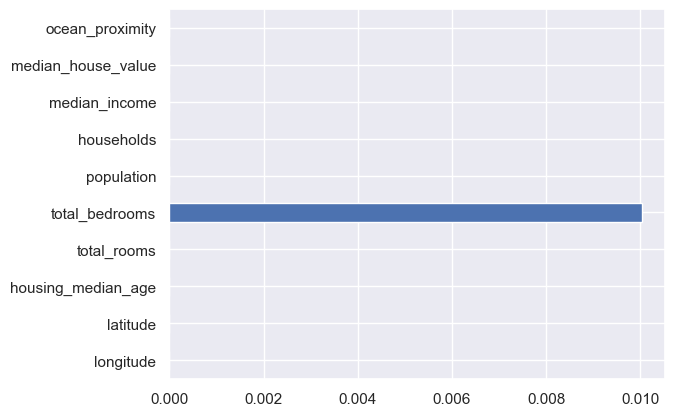

In [9]:
cal_housing_prices.isna().mean().plot.barh();

- Is there any issues with the data types?
> - The `ocean_proximity_table` is of object type and may need further investigation.

In [10]:
cal_housing_prices["ocean_proximity"].apply(type).value_counts()

ocean_proximity
<class 'str'>    20640
Name: count, dtype: int64

#### Clean the data

- Since the percentage of missing data is relatively small, the rows with missing data can be droped safely.

In [11]:
cal_housing_prices.dropna(inplace=True)

- Convert `ocean_proximity` to category data type.

In [12]:
# Memory usage for ocean_proximity column before conversion:
(before := cal_housing_prices.memory_usage().sum())
print(f"Memory usage in kilobytes: {before / 1024:.2f}")

Memory usage in kilobytes: 1755.96


In [13]:
# Convert ocean_proximity to category & calculate difference in memory_usage:
cal_housing_prices["ocean_proximity"] = cal_housing_prices["ocean_proximity"].astype("category")
(after := cal_housing_prices.memory_usage().sum())
print(f"Difference in memory usage in kilobytes: {(before - after) / 1024:.2f}")

Difference in memory usage in kilobytes: 139.47


- Specify columns by data type.

In [14]:
target_col = "median_house_value"

In [15]:
cat_cols = cal_housing_prices.select_dtypes(exclude="number").columns.tolist()
cat_cols

['ocean_proximity']

In [16]:
num_cols = [c for c in cal_housing_prices.select_dtypes(include="number").columns.tolist() if c != target_col]
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

## Step #02: Exploratory Data Analysis

### Get the big picture

#### Screen the distribution of univariate numerical variables & the relationship between them all at once

CPU times: total: 53.8 s
Wall time: 55.4 s


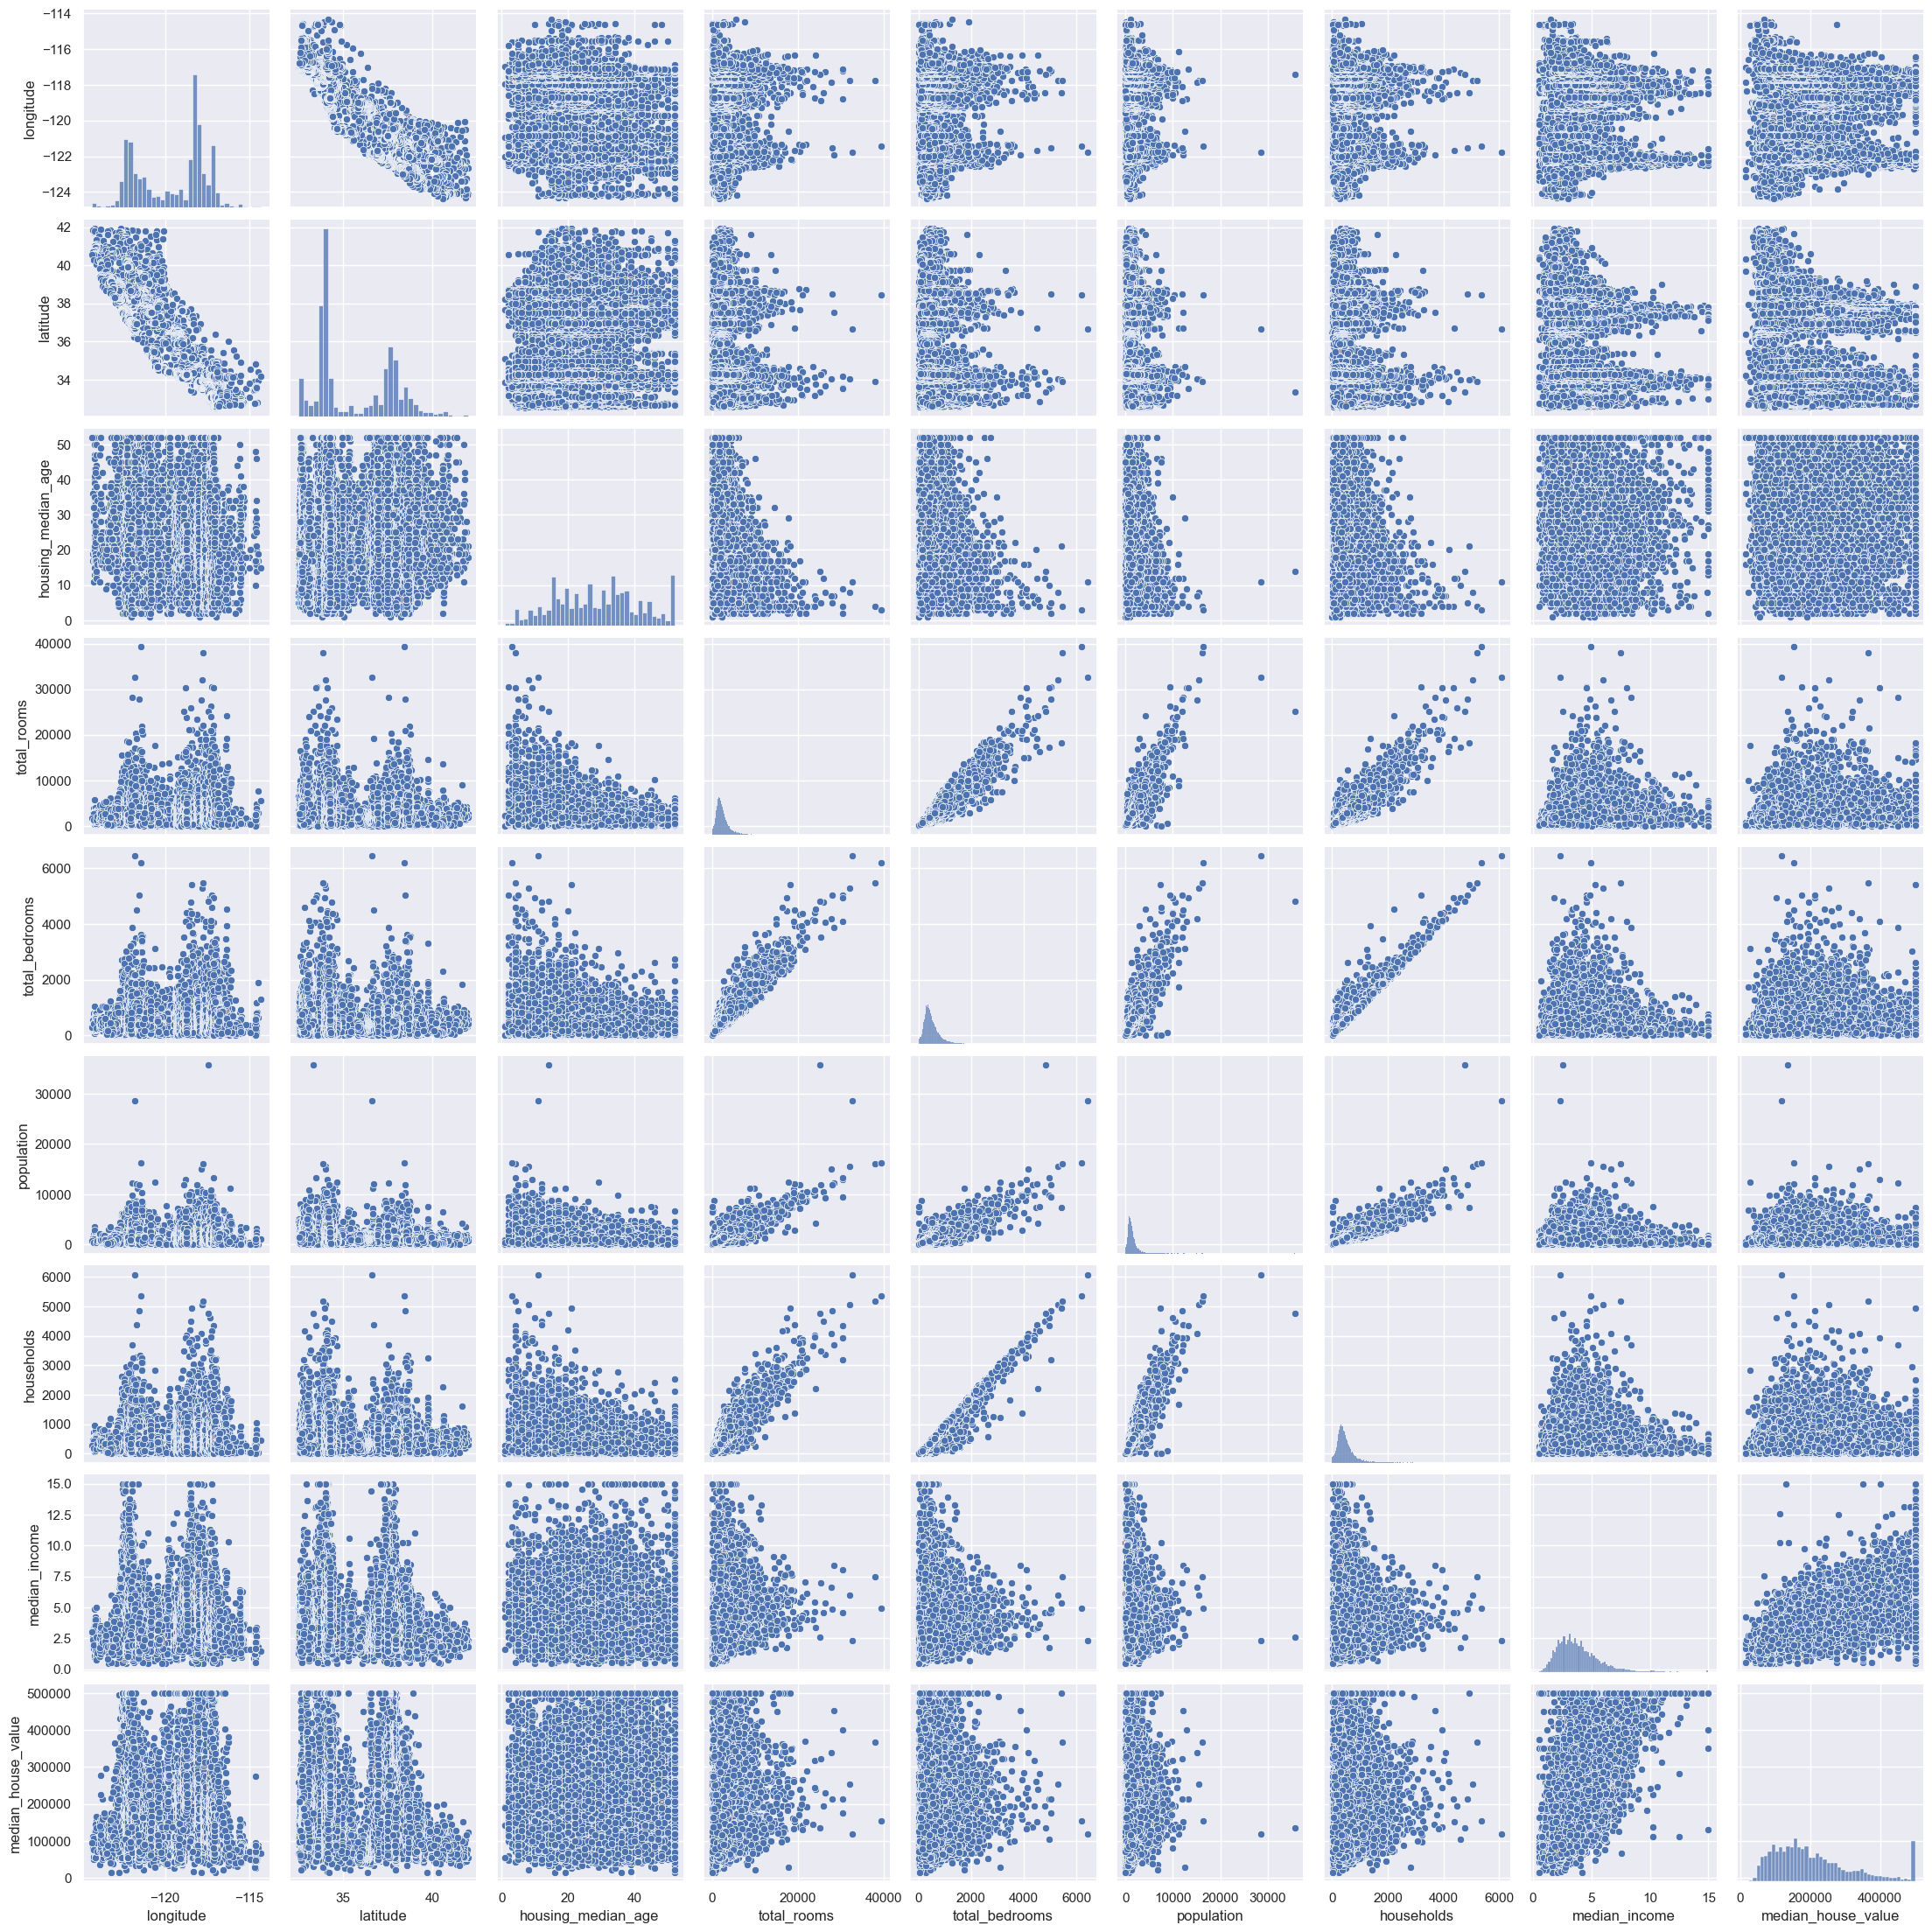

In [17]:
%%time
sns.pairplot(cal_housing_prices);

#### Search for any (linear) correlations

In [18]:
# Target column:
corrs = cal_housing_prices.select_dtypes(include="number").corr()
corrs[target_col].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

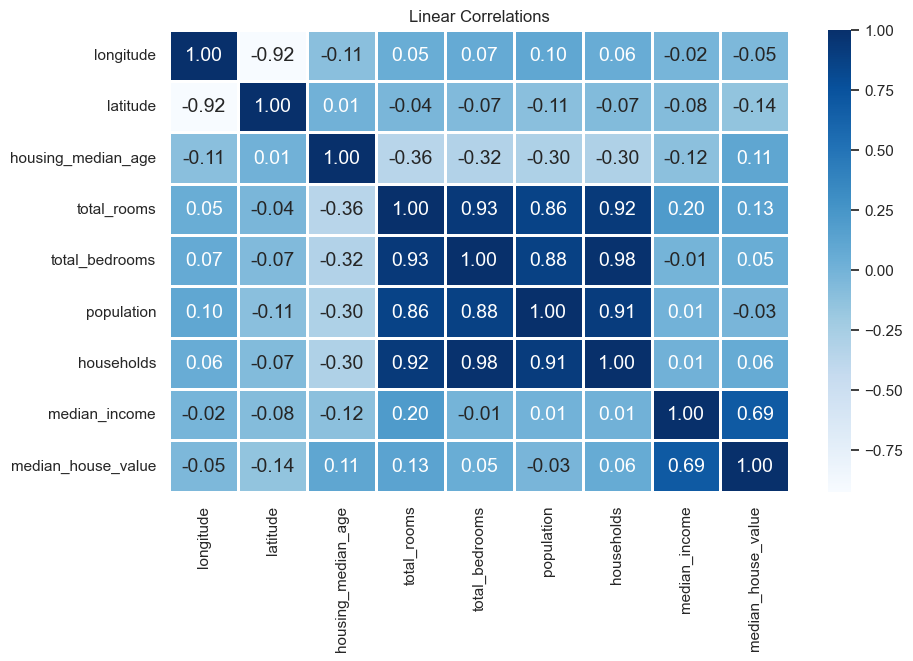

In [19]:
# Plot the correlations of all columns:
plt.figure(figsize=(10, 6))
g = sns.heatmap(
    data=corrs,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 14},
    linewidth=1
)

g.set(title="Linear Correlations");

### Explore univariate variables

#### Investigate the distribution of `median_house_value`

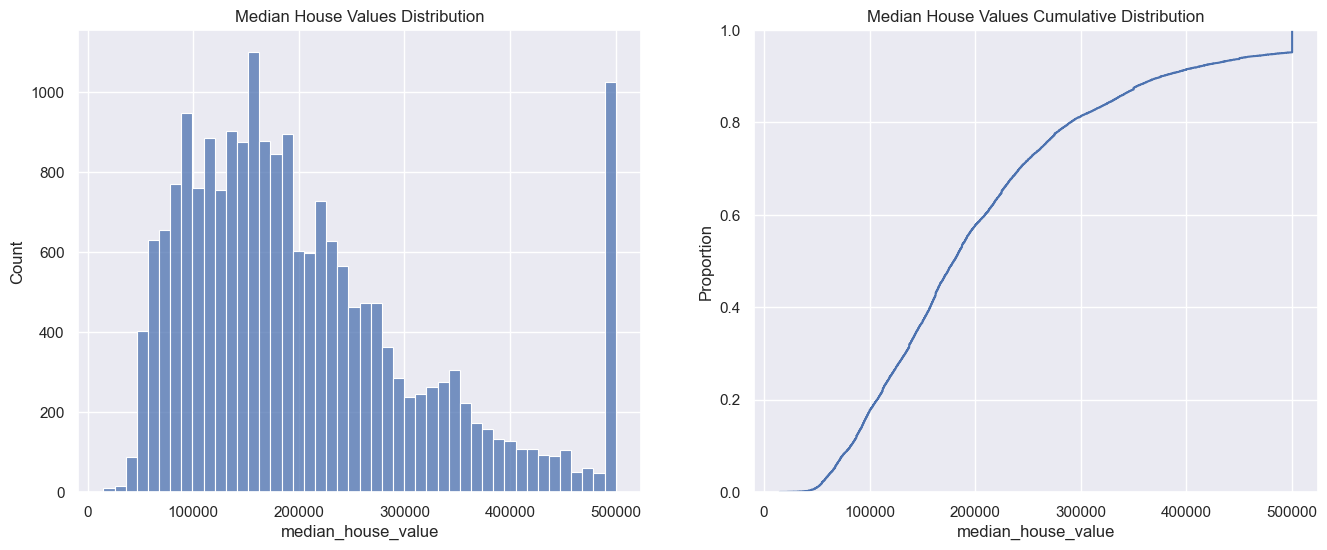

In [20]:
# Create a figure with 2 subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The 1st ax:
g1 = sns.histplot(
    data=cal_housing_prices,
    x="median_house_value",
    ax=ax1
)

# The 2nd ax:
g2 = sns.ecdfplot(
    data=cal_housing_prices,
    x="median_house_value",
    ax=ax2
)

# Customize titles:
g1.set(title="Median House Values Distribution")
g2.set(title="Median House Values Cumulative Distribution");

#### Investigate the distribution of `median_income`

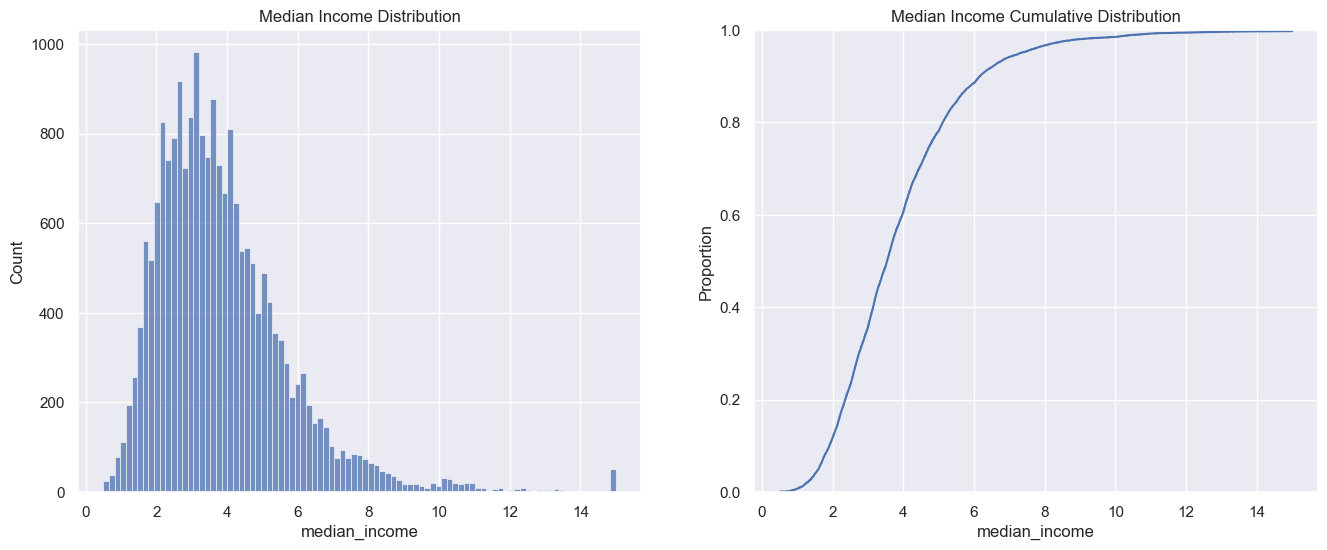

In [21]:
# Create a figure with 2 subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The 1st ax:
g1 = sns.histplot(
    data=cal_housing_prices,
    x="median_income",
    ax=ax1
)

# The 2nd ax:
g2 = sns.ecdfplot(
    data=cal_housing_prices,
    x="median_income",
    ax=ax2
)

# Customize titles:
g1.set(title="Median Income Distribution")
g2.set(title="Median Income Cumulative Distribution");

#### Investigate the frequency of `ocean_proximity` categories

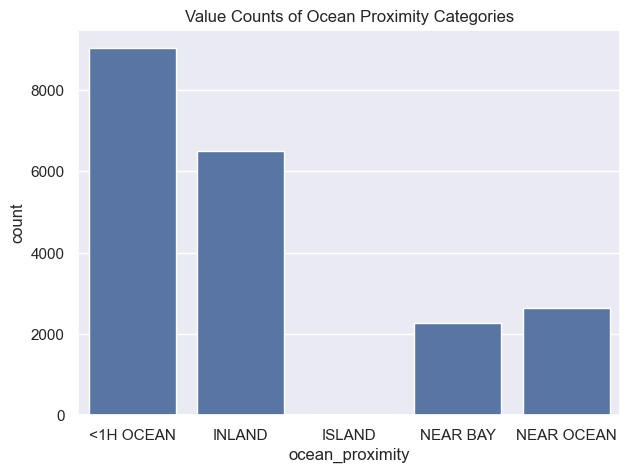

In [22]:
# Create a figure:
fig = plt.figure(figsize=(7, 5))

# Plot the data:
g = sns.countplot(
    data=cal_housing_prices,
    x="ocean_proximity",
    color="#4c72b0"
)

# Customize title:
g.set(title="Value Counts of Ocean Proximity Categories");

### Explore bivariate relationships

#### Investigate the relationship between `median_house_value` & `median_income`

<Figure size 640x480 with 0 Axes>

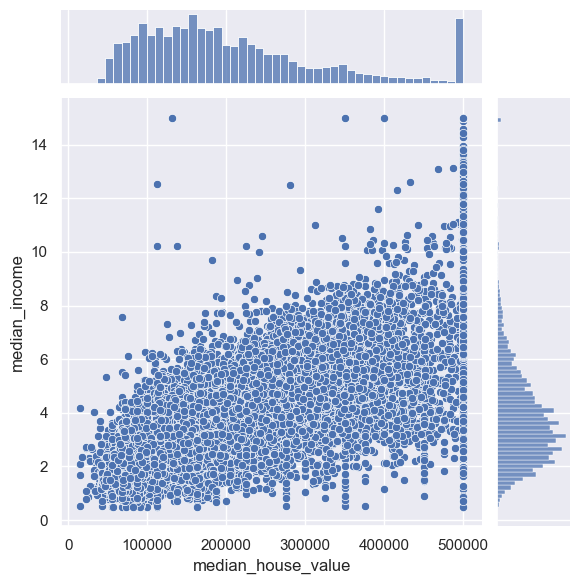

In [23]:
# Create a figure:
fig = plt.figure()

# Plot the data:
g = sns.jointplot(
    data=cal_housing_prices,
    x="median_house_value",
    y="median_income"
)

# Customize title:
g1.set(title="Median House Values Vs. Median Income");

#### Investigate the relationship between `median_house_value` & `ocean_proximity`

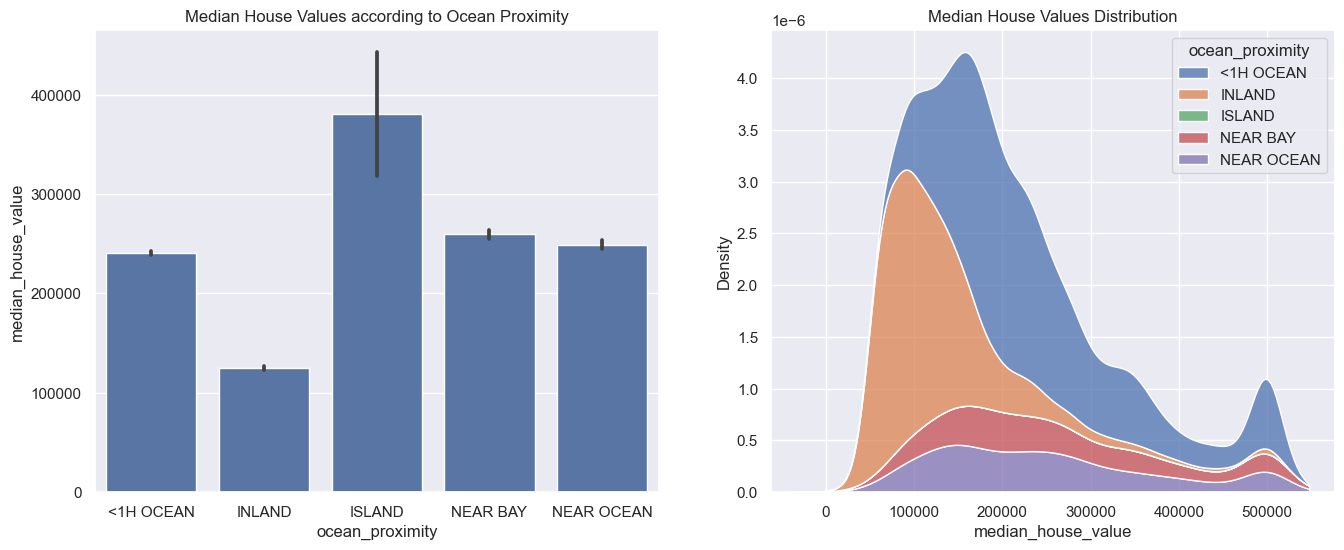

In [24]:
# Create a figure with 2 subplots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The 1st ax:
g1 = sns.barplot(
    data=cal_housing_prices,
    x="ocean_proximity",
    y="median_house_value",
    color="#4c72b0",
    ax=ax1
)

# The 2nd ax:
g2 = sns.kdeplot(
    data=cal_housing_prices,
    x="median_house_value",
    hue="ocean_proximity",
    multiple="stack",
    ax=ax2
)

# Customize titles:
g1.set(title="Median House Values according to Ocean Proximity")
g2.set(title="Median House Values Distribution");

### Explore more relationships

#### Investigate the relationship between the highly correlated variables

CPU times: total: 15.1 s
Wall time: 15.3 s


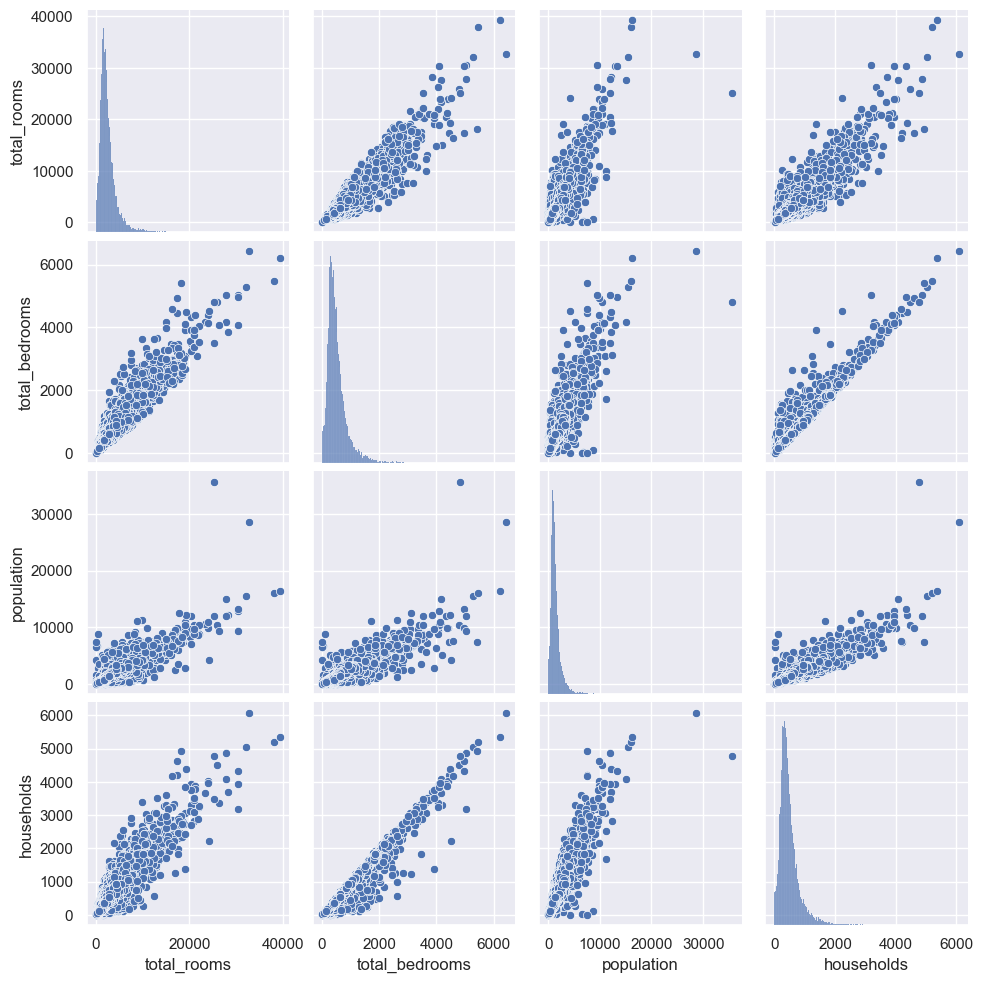

In [25]:
%%time
sns.pairplot(cal_housing_prices[["total_rooms", "total_bedrooms", "population", "households"]]);

#### Investigate the relationship between `median_house_value`, `population` & geographical location

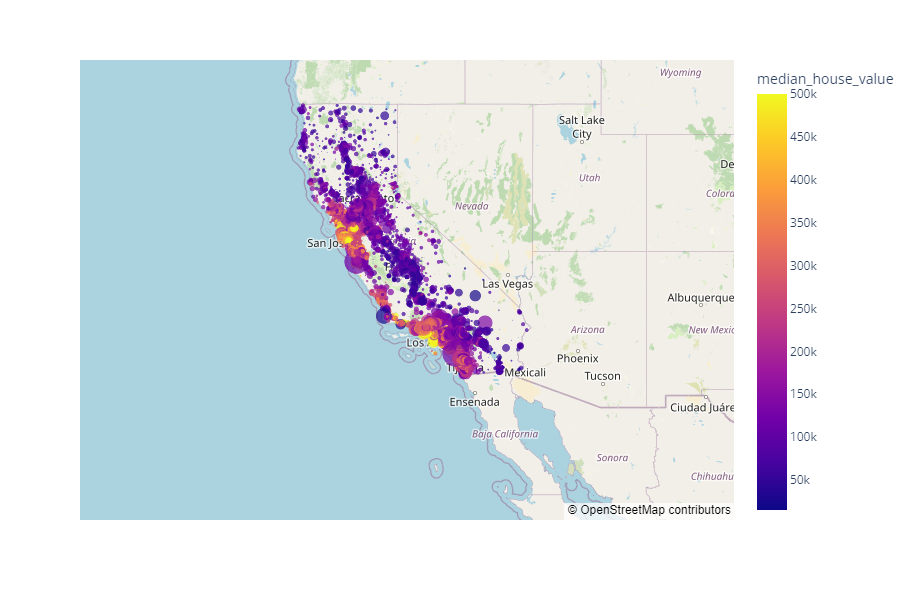

In [26]:
# Create a figure:
fig = px.scatter_mapbox(
    data_frame=cal_housing_prices,
    lat="latitude",
    lon="longitude",
    color="median_house_value",
    size="population",
    zoom=4,
    height=600
)

# Update layout and show the plot:
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Baseline approach to feature selection and/or elimination

#### Encode categorical variables and split the data

In [27]:
# Encode categorical variables:
dummies_df = pd.get_dummies(
    data=cal_housing_prices,
    prefix="",
    prefix_sep="",
    drop_first=True,
    dtype=int
)

In [28]:
# Specify columns with dummy variables:
dummies = set(dummies_df.columns) - set(cal_housing_prices.columns)
dummies

{'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [29]:
# Explore the first few rows:
dummies_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  INLAND  ISLAND   
0       322.0       126.0         8.3252            452600.0       0       0  \
1      2401.0      1138.0         8.3014            358500.0       0       0   
2       496.0       177.0         7.2574            352100.0       0       0   
3       558.0       219.0         5.6431            341300.0       0       0   
4       565.0       259.0         3.8462            342200.0       0       0   

   NEAR BAY  NEAR OCEAN  
0         1           0  
1         1           0  
2         1           0  
3         1           0  
4         1           0

In [30]:
# Split the data into a feature matrix and a target vector:
features = dummies_df.drop(target_col, axis=1)
target = dummies_df[target_col]

#### Test for multicollinearity with `statsmodels` package

In [31]:
# Exclude longitude and latitude columns:
features_without_long_lat = features.drop(["longitude", "latitude"], axis=1)

In [32]:
# add a constant to the predictor variables:
features_without_long_lat_plus_const = sm.add_constant(features_without_long_lat)

In [33]:
# Create and it the OLS (ordinary least squares) model:
model = sm.OLS(target, features_without_long_lat_plus_const).fit()

In [34]:
# Print model summary:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3545.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        11:39:27   Log-Likelihood:            -2.5689e+05
No. Observations:               20433   AIC:                         5.138e+05
Df Residuals:                   20422   BIC:                         5.139e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.611e+04   2467

In [35]:
# calculate the variance inflation factor (VIF) for each predictor variable:
vif_df = pd.DataFrame()
vif_df["VIF Factor"] = [variance_inflation_factor(features_without_long_lat_plus_const.values, i) for i in range(features_without_long_lat_plus_const.shape[1])]
vif_df["features"] = features_without_long_lat_plus_const.columns

In [36]:
# Print the VIF for each predictor variable:
vif_df = vif_df.round(2).sort_values(by="VIF Factor", ascending=False)
vif_df.query("features != 'const'")

VIF Factor            features
3        35.63      total_bedrooms
5        34.31          households
2        12.85         total_rooms
4         6.37          population
6         1.75       median_income
7         1.44              INLAND
1         1.31  housing_median_age
9         1.19            NEAR BAY
10        1.14          NEAR OCEAN
8         1.00              ISLAND

- How to interpret the results?
> - VIF = 1: there is no correlation between a given predictor variable and any other predictor variables in the model,
> - VIF between 1 and 5: there is moderate correlation between a given predictor variable and other predictor variables in the model,
> - VIF > 5: there is severe correlation between a given predictor variable and other predictor variables in the model.

- Remove the features with high multicolinearity and re-inspect the model:

In [37]:
exclude_more_cols = ["total_rooms", "households"]
selected_features = features_without_long_lat_plus_const.drop(exclude_more_cols, axis=1)
model = sm.OLS(target, selected_features).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4363.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        11:39:28   Log-Likelihood:            -2.5699e+05
No. Observations:               20433   AIC:                         5.140e+05
Df Residuals:                   20424   BIC:                         5.141e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.359e+04   2326

In [38]:
vif_df = pd.DataFrame()
vif_df["VIF Factor"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
vif_df["features"] = selected_features.columns
vif_df = vif_df.round(2).sort_values(by="VIF Factor", ascending=False)
vif_df.query("features != 'const'")

VIF Factor            features
2        4.52      total_bedrooms
3        4.44          population
5        1.32              INLAND
1        1.30  housing_median_age
7        1.18            NEAR BAY
8        1.13          NEAR OCEAN
4        1.11       median_income
6        1.00              ISLAND

#### Univariate feature selection

In [39]:
method_to_features = {}
for score_func in [r_regression, f_regression, mutual_info_regression]:
    
    # Create a selector:
    selector = SelectKBest(score_func=score_func, k=7)

    # Determine irrelevant features:
    _ = selector.fit(selected_features.drop("const", axis=1), target)
    before = _.feature_names_in_
    after = _.get_feature_names_out()
    droped = set(before) - set(after)
    irrelevant_features = droped if len(droped) else "None!"
    
    # Print and cache irrelevant features:
    print(f"Irrelevant features for {score_func.__name__}: {irrelevant_features}")
    method_to_features[score_func.__name__] = after.tolist()

Irrelevant features for r_regression: {'INLAND'}
Irrelevant features for f_regression: {'ISLAND'}
Irrelevant features for mutual_info_regression: {'ISLAND'}


#### Thresholding numerical feature variance with `sklearn` package

In [40]:
# Exclude dummies:
features_without_dummies = features.drop(dummies, axis=1)

In [41]:
# Create a selector:
selector = VarianceThreshold(threshold=0.80)

In [42]:
# Determine irrelevant features:
_ = selector.fit(features_without_dummies, target)
before = _.feature_names_in_
after = _.get_feature_names_out()
droped = set(before) - set(after)
irrelevant_features = droped if len(droped) else "None!"

In [43]:
# Print and cache irrelevant features:
print(f"Irrelevant features for variance thresholding: {irrelevant_features}")

Irrelevant features for variance thresholding: None!


## Step #03: Communicate Key Findings

- **Caregorical features need to be numerically encoded.**
- **Numerical features need to scaled with a suitable method that can handle skewed data.**
- **There is a linear clear relationship between `median_house_value` and `median_income`.**
- **Not all relationships in the data are linear.**
- **Features with high multicolinearity and categories with low frequency are good candidates for feature elimination.**

In [44]:
dummies_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [45]:
# Save the data after initial feature selection and/or elimination:
irrelevant_features = ["total_bedrooms", "households", "ISLAND"]
relevant_features = dummies_df.drop(irrelevant_features, axis=1)
relevant_features.to_csv("./datasets/relevant_features.csv")